# Tableau Data Preparations

Goal is to set up data for easy integration into Tableau. Specifically, I want to create a spiral column chart that shows all medals per year, per event in speedskating over the course of all Winter Olympics.

To create a complete visualization two things need to happen:
- inserting nulls for cancelled Winter Olympics during WWII
- creating an index column to sort by in Tableau

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = [12,6]
plt.style.use('ggplot')
sns.set_theme(style="darkgrid")

In [2]:
speedskating = pd.read_csv('speedskating.csv')

In [3]:
speedskating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Event         569 non-null    object
 1   Medal         569 non-null    object
 2   Rank          569 non-null    int64 
 3   Country       569 non-null    object
 4   Country_Code  569 non-null    object
 5   Athlete       569 non-null    object
 6   Continent     569 non-null    object
 7   Host City     569 non-null    object
 8   Year          569 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 40.1+ KB


In [4]:
speedskating.head()

,Event,Medal,Rank,Country,Country_Code,Athlete,Continent,Host City,Year
0,5000m men,Gold,1,Netherlands,NED,Sven KRAMER,Europe,Pyeongchang,2018
1,5000m men,Silver,2,Canada,CAN,Ted-Jan BLOEMEN,North America,Pyeongchang,2018
2,5000m men,Bronze,3,Norway,NOR,Sverre Lunde PEDERSEN,Europe,Pyeongchang,2018
3,Mass start women,Gold,1,Japan,JPN,Nana TAKAGI,Asia,Pyeongchang,2018
4,Mass start women,Silver,2,Republic of Korea,KOR,Bo Reum KIM,Asia,Pyeongchang,2018


In [5]:
speedskating['Year'].unique() #check which years are missing

array([2018, 2014, 2010, 2006, 2002, 1998, 1994, 1992, 1988, 1984, 1980,
       1976, 1972, 1968, 1964, 1960, 1956, 1952, 1948, 1936, 1932, 1928,
       1924])

In [6]:
speedskating[speedskating['Year']==1936] #last WO before WWII

,Event,Medal,Rank,Country,Country_Code,Athlete,Continent,Host City,Year
518,500m men,Gold,1,Norway,NOR,Ivar BALLANGRUD,Europe,Garmisch-Partenkirchen,1936
519,500m men,Silver,2,Norway,NOR,Georg KROG,Europe,Garmisch-Partenkirchen,1936
520,500m men,Bronze,3,United States of America,USA,Leo FREISINGER,North America,Garmisch-Partenkirchen,1936
521,1500m men,Gold,1,Norway,NOR,Charles MATHISEN,Europe,Garmisch-Partenkirchen,1936
522,1500m men,Silver,2,Norway,NOR,Ivar BALLANGRUD,Europe,Garmisch-Partenkirchen,1936
523,1500m men,Bronze,3,Finland,FIN,Birger WASENIUS,Europe,Garmisch-Partenkirchen,1936
524,5000m men,Gold,1,Norway,NOR,Ivar BALLANGRUD,Europe,Garmisch-Partenkirchen,1936
525,5000m men,Silver,2,Finland,FIN,Birger WASENIUS,Europe,Garmisch-Partenkirchen,1936
526,5000m men,Bronze,3,Finland,FIN,Antero OJALA,Europe,Garmisch-Partenkirchen,1936
527,10000m men,Gold,1,Norway,NOR,Ivar BALLANGRUD,Europe,Garmisch-Partenkirchen,1936


In [7]:
speedskating[speedskating['Year']==1948] #first WO after WWII

,Event,Medal,Rank,Country,Country_Code,Athlete,Continent,Host City,Year
505,500m men,Gold,1,Norway,NOR,Finn HELGESEN,Europe,St-Moritz,1948
506,500m men,Silver,2,United States of America,USA,Ken Bartholomew,North America,St-Moritz,1948
507,500m men,Silver,2,Norway,NOR,Thomas BYBERG,Europe,St-Moritz,1948
508,500m men,Silver,2,United States of America,USA,Robert FITZGERALD,North America,St-Moritz,1948
509,10000m men,Gold,1,Sweden,SWE,Ake SEYFFARTH,Europe,St-Moritz,1948
510,10000m men,Silver,2,Finland,FIN,Lauri PARKKINEN,Europe,St-Moritz,1948
511,10000m men,Bronze,3,Finland,FIN,Pentti LAMMIO,Europe,St-Moritz,1948
512,1500m men,Gold,1,Norway,NOR,Sverre FARSTAD,Europe,St-Moritz,1948
513,1500m men,Silver,2,Sweden,SWE,Ake SEYFFARTH,Europe,St-Moritz,1948
514,1500m men,Bronze,3,Norway,NOR,Odd LUNDBERG,Europe,St-Moritz,1948


Due to the race format and imprecise measuring equipment it was more common to have the 'same' result (time measured accuratley up to 10^-1 s). Whilst looking into this event I've stumbled upon the following magnificent piece of Olympic history.

"The three silver medallists posed a problem to the organization, which only had two silver medals on hand. Therefore, it decided to hand out a bronze medal to one of the Americans, later to be replaced by one of the proper color. The American delegation picked Fitzgerald to receive the silver, and Bartholomew to receive the temporary bronze. This infuriated the temperamental Bartholomew, who refused to go to the medal ceremony. Instead, fifth-placed [Ken Henry] showed up, seemingly to receive this bronze medal on behalf of his team mate. But Henry kept the medal to himself, although he did win his own Olympic medal when he won the 1952 event in Oslo. It is not known if Bartholomew ever received his silver medal, but he was sent home by the US team leader immediately after the incident. Despite his status as one of the best American sprinters in the coming years, he was never again selected for international competition."

source: https://web.archive.org/web/20200417192325/https://www.sports-reference.com/olympics/winter/1948/SSK/mens-500-metres.html

We can safely assume that in there having occured no change in events between the last game before WWII, and the first game after, the cancelled games would've consisten of the same number of events. As such, we will use this to fill in the missing data.

I will use the 1936 as a starting dataframe, simply because the games of 1940 would have been orignized there as well.

In [8]:
wo_1940 = speedskating[speedskating['Year']==1936] #creating new df out of the 1936 Winter Olympics

In [9]:
wo_1940[['Rank','Country','Country_Code','Athlete','Continent']] = np.NaN #setting values to null

<ipython-input-9-989ba78c4a5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo_1940[['Rank','Country','Country_Code','Athlete','Continent']] = np.NaN #setting values to null
/Users/niekvanderzwaag/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
wo_1940['Year']=1940 #setting correct year

<ipython-input-10-563ad423b22d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo_1940['Year']=1940 #setting correct year


In [11]:
wo_1940 #checking if outcome is sufficient

,Event,Medal,Rank,Country,Country_Code,Athlete,Continent,Host City,Year
518,500m men,Gold,NaN,NaN,NaN,NaN,NaN,Garmisch-Partenkirchen,1940
519,500m men,Silver,NaN,NaN,NaN,NaN,NaN,Garmisch-Partenkirchen,1940
520,500m men,Bronze,NaN,NaN,NaN,NaN,NaN,Garmisch-Partenkirchen,1940
521,1500m men,Gold,NaN,NaN,NaN,NaN,NaN,Garmisch-Partenkirchen,1940
522,1500m men,Silver,NaN,NaN,NaN,NaN,NaN,Garmisch-Partenkirchen,1940
523,1500m men,Bronze,NaN,NaN,NaN,NaN,NaN,Garmisch-Partenkirchen,1940
524,5000m men,Gold,NaN,NaN,NaN,NaN,NaN,Garmisch-Partenkirchen,1940
525,5000m men,Silver,NaN,NaN,NaN,NaN,NaN,Garmisch-Partenkirchen,1940
526,5000m men,Bronze,NaN,NaN,NaN,NaN,NaN,Garmisch-Partenkirchen,1940
527,10000m men,Gold,NaN,NaN,NaN,NaN,NaN,Garmisch-Partenkirchen,1940


In [12]:
wo_1944 = pd.DataFrame.copy(wo_1940) #creating new df for 1940 Winter Olympics

In [13]:
wo_1944['Year']=1944 #setting correct year

In [14]:
wo_1944['Host City']= "Cortina d'Ampezzo" #setting correct Host City

In [15]:
wo_1944 #checking if outcome is sufficient

,Event,Medal,Rank,Country,Country_Code,Athlete,Continent,Host City,Year
518,500m men,Gold,NaN,NaN,NaN,NaN,NaN,Cortina d'Ampezzo,1944
519,500m men,Silver,NaN,NaN,NaN,NaN,NaN,Cortina d'Ampezzo,1944
520,500m men,Bronze,NaN,NaN,NaN,NaN,NaN,Cortina d'Ampezzo,1944
521,1500m men,Gold,NaN,NaN,NaN,NaN,NaN,Cortina d'Ampezzo,1944
522,1500m men,Silver,NaN,NaN,NaN,NaN,NaN,Cortina d'Ampezzo,1944
523,1500m men,Bronze,NaN,NaN,NaN,NaN,NaN,Cortina d'Ampezzo,1944
524,5000m men,Gold,NaN,NaN,NaN,NaN,NaN,Cortina d'Ampezzo,1944
525,5000m men,Silver,NaN,NaN,NaN,NaN,NaN,Cortina d'Ampezzo,1944
526,5000m men,Bronze,NaN,NaN,NaN,NaN,NaN,Cortina d'Ampezzo,1944
527,10000m men,Gold,NaN,NaN,NaN,NaN,NaN,Cortina d'Ampezzo,1944


In [16]:
speedskating_complete = pd.concat([speedskating,wo_1940,wo_1944],ignore_index=True) #concatinating dataframes into one

In [17]:
speedskating_complete.info() #checking shape and columns compared to original speedskating df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Event         593 non-null    object 
 1   Medal         593 non-null    object 
 2   Rank          569 non-null    float64
 3   Country       569 non-null    object 
 4   Country_Code  569 non-null    object 
 5   Athlete       569 non-null    object 
 6   Continent     569 non-null    object 
 7   Host City     593 non-null    object 
 8   Year          593 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 41.8+ KB


In [18]:
speedskating_complete.sort_values(by=['Year','Event','Rank'],inplace=True) #sorting order to set up for Tableau

In [19]:
speedskating_complete.reset_index(drop=True,inplace=True) #resetting index

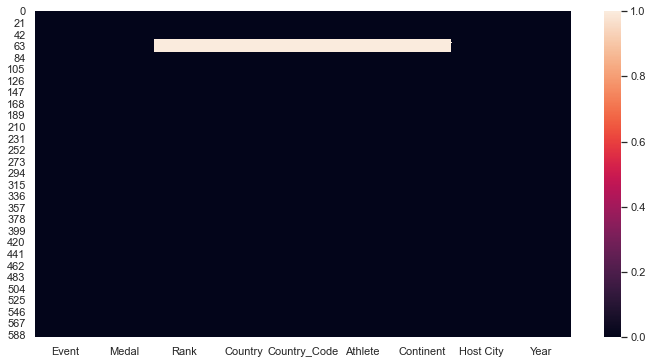

In [20]:
sns.heatmap(data=speedskating_complete.isna()); #visually verifying nulls show up where they are expected, don't have any other missing values, and index is set correctly.

In [21]:
speedskating_complete #verifying index

,Event,Medal,Rank,Country,Country_Code,Athlete,Continent,Host City,Year
0,10000m men,Gold,1.0,Finland,FIN,Julius SKUTNABB,Europe,Chamonix,1924
1,10000m men,Silver,2.0,Finland,FIN,Clas THUNBERG,Europe,Chamonix,1924
2,10000m men,Bronze,3.0,Norway,NOR,Roald LARSEN,Europe,Chamonix,1924
3,1500m men,Gold,1.0,Finland,FIN,Clas THUNBERG,Europe,Chamonix,1924
4,1500m men,Silver,2.0,Norway,NOR,Roald LARSEN,Europe,Chamonix,1924
...,...,...,...,...,...,...,...,...,...
588,Team pursuit men,Silver,2.0,Republic of Korea,KOR,Team Republic of Korea,Asia,Pyeongchang,2018
589,Team pursuit men,Bronze,3.0,Netherlands,NED,Team Netherlands,Europe,Pyeongchang,2018
590,Team pursuit women,Gold,1.0,Japan,JPN,Team Japan,Asia,Pyeongchang,2018
591,Team pursuit women,Silver,2.0,Netherlands,NED,Team Netherlands,Europe,Pyeongchang,2018


In [22]:
speedskating_complete.reset_index(inplace=True) #create index row to sort by in Tableau

In [23]:
speedskating_complete['Rank_bar'] = speedskating_complete['Rank'] #create new column for flipped values - so that gold bars are biggest, bronze smallest in Tableau

In [24]:
#simple flip function
def flip_n(x):
    if x == 1:
       return 3
    elif x == 3:
       return 1
    elif x == 2:
       return 2    
    else:
       return 0

In [25]:
speedskating_complete['Rank_bar'] = speedskating_complete['Rank_bar'].apply(flip_n) #apply function

In [26]:
speedskating_complete #ready for output

,index,Event,Medal,Rank,Country,Country_Code,Athlete,Continent,Host City,Year,Rank_bar
0,0,10000m men,Gold,1.0,Finland,FIN,Julius SKUTNABB,Europe,Chamonix,1924,3
1,1,10000m men,Silver,2.0,Finland,FIN,Clas THUNBERG,Europe,Chamonix,1924,2
2,2,10000m men,Bronze,3.0,Norway,NOR,Roald LARSEN,Europe,Chamonix,1924,1
3,3,1500m men,Gold,1.0,Finland,FIN,Clas THUNBERG,Europe,Chamonix,1924,3
4,4,1500m men,Silver,2.0,Norway,NOR,Roald LARSEN,Europe,Chamonix,1924,2
...,...,...,...,...,...,...,...,...,...,...,...
588,588,Team pursuit men,Silver,2.0,Republic of Korea,KOR,Team Republic of Korea,Asia,Pyeongchang,2018,2
589,589,Team pursuit men,Bronze,3.0,Netherlands,NED,Team Netherlands,Europe,Pyeongchang,2018,1
590,590,Team pursuit women,Gold,1.0,Japan,JPN,Team Japan,Asia,Pyeongchang,2018,3
591,591,Team pursuit women,Silver,2.0,Netherlands,NED,Team Netherlands,Europe,Pyeongchang,2018,2


In [27]:
speedskating_complete.to_csv('./speedskating_tableau.csv', index=False) #export